# Quick demo of the pandas module's time series functionality using bristol air quality data.

## Bristol Air Quality Data

KWMC (Knowle West Media Centre) worked with local community organisations to help them install Luftdaten air pollution sensors around Bristol, you can find out more on the project's website (http://www.bristolapproach.org/)

Kev Kirkland, the founder of Data Unity then worked with KWMC to make the data accessible to others, you can find it on GitHub here: https://github.com/bristolapproach/bristol-air-quality

It allows you to get up-to-date data from the static Luftdaten sensors that KWMC installed around Bristol. 

And you can play around some of the graphs he made on the associated GitHub page.

We're just going to use this data as an example of the time series functionality that's built-in to pandas.

In [29]:
import pandas as pd

In [30]:
big_df = pd.read_csv('big_pollution_5mins_messy.csv',index_col='timestamp')
display(big_df.head())
print(big_df.index.dtype)

,17314,17316,17318,17459,17502,17506,19615
timestamp,,,,,,,
2018-11-20 11:45:00,NaN,NaN,NaN,13.035,9.970000,6.23,NaN
2019-02-06 03:15:00,NaN,NaN,37.950000,NaN,NaN,34.35,26.165
2018-10-23 07:00:00,21.150,17.150,21.565000,NaN,19.420000,NaN,NaN
2018-11-07 00:55:00,11.335,10.785,9.546667,NaN,11.833333,10.65,NaN
2018-10-23 01:05:00,15.885,12.935,15.135000,NaN,18.450000,NaN,NaN


object


The column names are identifiers of different pollution sensors in bristol, while the values contain the level of P10 size (less than 10 micrometers big) particulate matter at that time of day.

We can see that our current data frame has the dates all out of order, which is obviously not going to be super useful. Sorting them would be a nightmare without proper datetime objects, but thankfully they work really well in pandas.

By default, pandas will load in the timestamp as an object (pandas version of string), but we can easily convert any relevant parts of the data frame to a datetime object, by using `to_datetime`, which will allow us to sort our dataframe easily and do other good stuff.

In [31]:
big_df.index = pd.to_datetime(big_df.index)
print(big_df.index.dtype)
big_df.sort_index(inplace=True)
display(big_df.head())

datetime64[ns]


,17314,17316,17318,17459,17502,17506,19615
timestamp,,,,,,,
2018-10-06 22:50:00,6.03,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-06 22:55:00,6.70,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-06 23:00:00,7.07,18.835,NaN,NaN,NaN,NaN,NaN
2018-10-06 23:05:00,6.65,16.570,7.67,NaN,NaN,NaN,NaN
2018-10-06 23:10:00,4.85,34.770,6.25,NaN,NaN,NaN,NaN


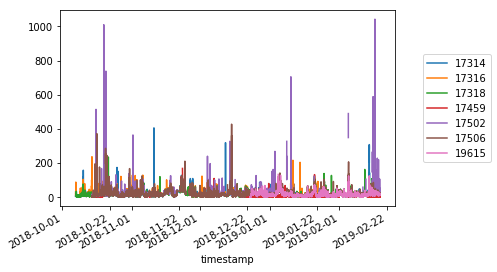

In [32]:
fig1=big_df.plot() #you can plot simply using `.plot`
fig1.legend(loc='right', bbox_to_anchor=(1.3,0.5)) #mess around with it with the usual matplotlib commands

We can resample our data to get a daily average for various timescales...

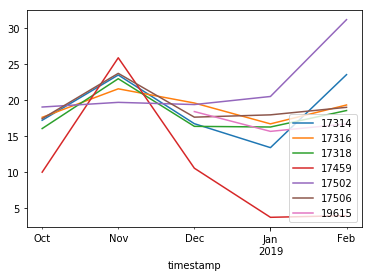

In [33]:
big_df.resample('1M').mean().plot() #D=day, #M=month,T=minute

We can also create rolling means very easily...

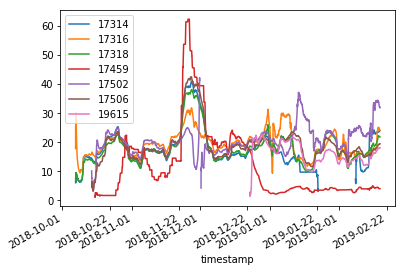

In [34]:
big_df.rolling('10D').mean().plot()

There is also a built in function for creating a cumulative sum...

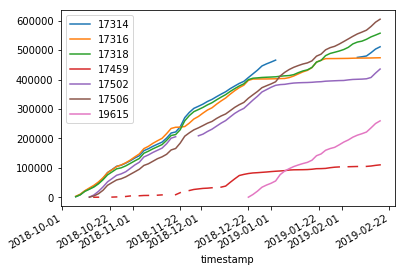

In [35]:
cumulative_pollution = big_df.cumsum() 
cumulative_pollution.resample('2D').mean().plot() 

We can use the `pd.Timestamp` to create timestamps to feed into other functions that are available in pandas.

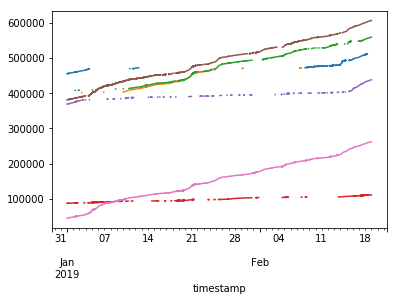

In [36]:
truncate = cumulative_pollution.truncate(before=pd.Timestamp('2019-01-01')).plot(legend=False) # `truncate` gets rid of everything before 'before' (or everything after 'after'...)

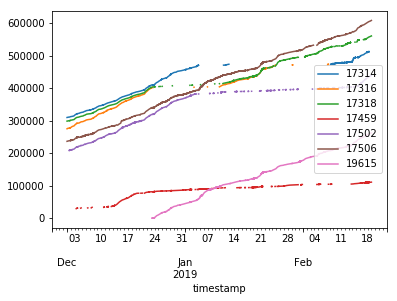

In [37]:
cumulative_pollution.loc[pd.Timestamp('2018-12-01'):].plot() # We can do the same with normal slicing (as Margriet has already shown you)

You can also upsample using `ffill`, `pad`, or `bfill` (using previous or next values)

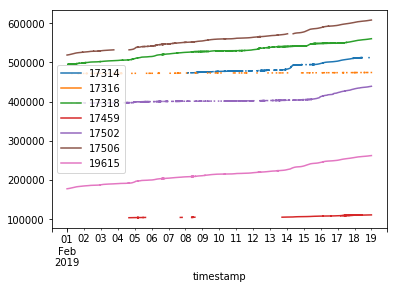

In [38]:
cumulative_pollution.loc[pd.Timestamp('2019-02-01'):].resample('30S').ffill().plot() #every 30 seconds

In [39]:
friday = pd.Timestamp('2018-01-05')
saturday = friday + pd.Timedelta('1 day') #add days
monday = friday + pd.offsets.BDay(1) # add business days
print(monday,monday.day_name())

2018-01-08 00:00:00 Monday


['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']


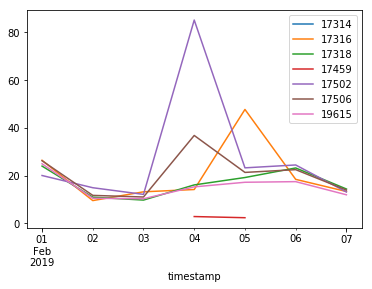

In [47]:
big_df.resample('1D').mean().truncate(before = pd.Timestamp('2019-02-01'), after = pd.Timestamp('2019-02-07')).plot()
days = [x.day_name() for x in fig_df.index]
print(days)

You can automatically make pandas Series with ranges of dates using `date_range`

In [53]:
pd.Series(pd.date_range('2020-03-01', freq='3D', periods=3))

0   2020-03-01
1   2020-03-04
2   2020-03-07
dtype: datetime64[ns]